In [69]:
import pandas as pd
import kagglehub
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn import model_selection

In [8]:
# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 25.6k/25.6k [00:00<00:00, 13.1MB/s]

Extracting files...
Path to dataset files: C:\Users\Chand\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2


In [12]:
dataset_path = r"C:\Users\Chand\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2\winequality-red.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows to confirm it loaded correctly
df.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [15]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5}

In [16]:
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [17]:
df.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2


In [22]:
df.shape

(1599, 12)

In [23]:
# keep 1000 samples for training and 599 as a separate set
df = df.sample(frac=1).reset_index(drop=True)

In [24]:
# top 1000 rows are selected for training
df_train = df.head(1000)

In [25]:
df_test = df.tail(599)

In [39]:
# initialize decision tree classifier class with a max depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)

In [40]:
# choose the columns you want to train 

cols = ['fixed acidity',
'volatile acidity',
'citric acid', 'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates', 'alcohol']

In [41]:
# train the model
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [42]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

In [43]:
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

In [51]:
training_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

In [45]:
train_accuracy

0.761

In [46]:
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [47]:
test_accuracy

0.5592654424040067

In [49]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline

In [50]:
# initialize lists to store accuracies
train_accuracies = [0.5]
test_accuracies = [0.5]

In [52]:
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    clf.fit(df_train[cols], df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    training_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

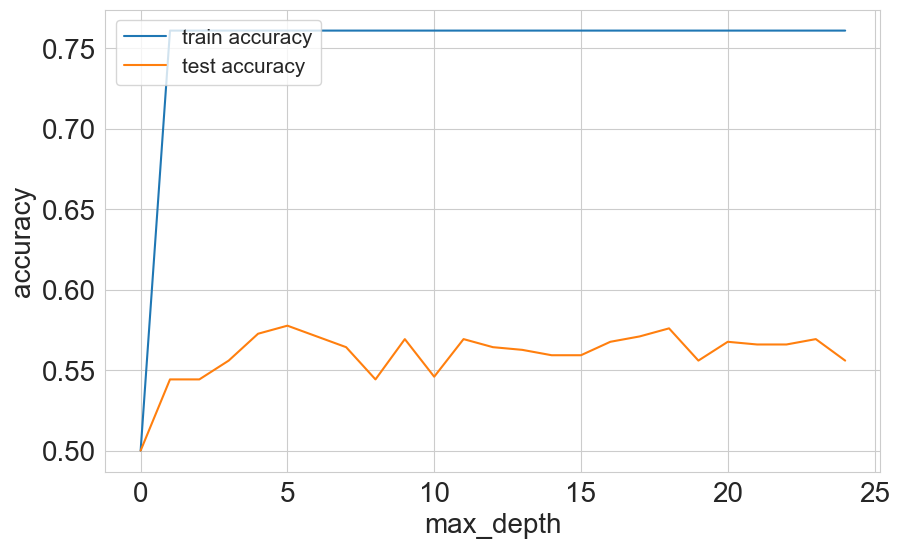

In [57]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

Text(0, 0.5, 'count')

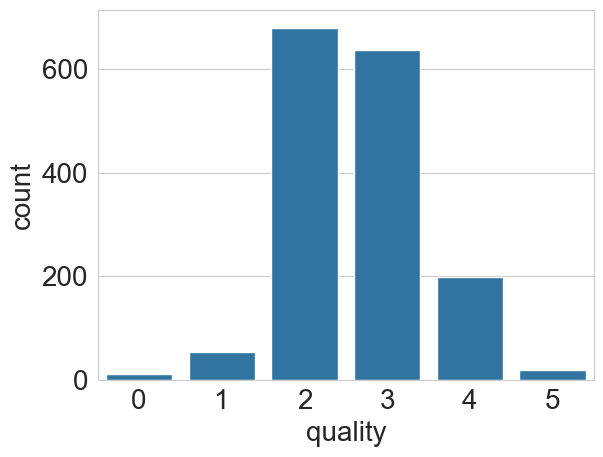

In [59]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [77]:
def create_folds(data):
    # create a new column
    data['kfold'] = -1

    data = data.sample(frac=1).reset_index(drop = True)

    # numb of bins by Sturge's rule
    num_bins = int(np.floor(1 + np.log2(len(data))))

    data.loc[:, 'bins'] = pd.cut(data['target'], bins=num_bins, labels=False)

    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=3)

    for f, (t_v, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

    data = data.drop('bins', axis=1)
    return data

## create a sample dataset with 15000 samples and 100 features and 1 target
if __name__ == "__main__":
    X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

    # create a dataframe 
    df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
    df.loc[:, "target"] = y

    # create folds
    df = create_folds(df)

In [78]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-1.631303,2.284234,-0.450537,-2.023507,-0.482578,1.484346,0.383815,3.347703,-0.220918,-0.806237,...,2.096446,0.625680,1.007877,-0.624166,0.329183,-0.012962,1.277054,0.109741,41.949141,0
1,0.034870,-0.812815,1.312829,-0.823667,-0.280512,1.017760,-0.086276,0.726022,0.405350,-0.189555,...,0.845279,0.626104,-0.292597,0.046968,0.965259,-0.573666,0.582612,-0.599388,169.177596,0
2,-0.302499,0.552506,-0.012380,-0.018283,-0.499933,-0.445227,-0.969595,2.312869,-0.911546,0.610776,...,0.009520,-0.987753,0.028291,-0.108289,0.388991,-0.578375,-0.013883,-1.127688,6.022999,0
3,0.191575,-0.934430,0.700270,1.050863,-0.872201,-0.225437,-0.823070,-0.605865,-0.499520,1.652793,...,0.649693,-0.489286,-0.207957,-1.602322,-0.181760,-0.406278,0.244448,-2.246587,-245.251111,0
4,-1.130752,0.294385,0.216562,0.851470,0.096533,-0.040757,1.210992,-1.888817,0.241080,-0.672204,...,0.430901,1.396881,-0.293453,1.633412,1.163071,-0.372557,0.372731,0.744553,-230.244908,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.329810,0.225611,-0.457787,1.545870,-1.138164,-2.119281,0.537157,0.593227,-0.618572,-0.046420,...,1.249019,0.435632,-1.254213,1.846043,1.612917,-2.042814,-1.671983,-0.270472,-315.523728,2
14996,-1.620367,-0.470865,0.363018,-0.357093,-0.198651,1.181223,0.140463,0.846755,0.473310,-0.689550,...,-1.025711,0.022860,-0.386589,0.551984,0.144028,0.123790,-0.239619,0.218903,66.449775,2
14997,0.851589,-0.950107,-0.182370,-0.199503,2.331833,-0.096736,1.074360,0.030347,-0.816344,0.004412,...,-0.122402,0.626074,0.883534,1.072844,-0.590305,0.895264,-0.390694,0.869576,-46.895230,2
14998,0.305464,0.933170,-1.270542,-0.377251,1.700350,0.352601,-1.681566,1.208778,-0.015851,-0.904571,...,-0.819915,-0.086040,1.094356,1.989726,-2.408347,-0.818739,2.726572,-1.352400,232.504006,2
